# **Waze Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your team is still in the early stages of their user churn project. So far, you’ve completed a project proposal and used Python to inspect and organize Waze’s user data.

You check your inbox and notice a new message from Chidi Ga, your team’s Senior Data Analyst. Chidi is pleased with the work you have already completed and requests your assistance with exploratory data analysis (EDA) and further data visualization. Harriet Hadzic, Waze's Director of Data Analysis, will want to review a Python notebook that shows your data exploration and visualization.

A notebook was structured and prepared to help you in this project. Please complete the following questions and prepare an executive summary.

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis.
<br/>

**The purpose** of this project is to conduct exploratory data analysis (EDA) on a provided dataset.

**The goal** is to continue the examination of the data that you began in the previous Course, adding relevant visualizations that help communicate the story that the data tells.
<br/>


*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluating and sharing results

<br/>


Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the [PACE Strategy Document ](https://docs.google.com/document/d/1iSHdbfQR6w8RClJNWai8oJXn9tQmYoTKn6QohuaK4-s/template/preview?resourcekey=0-ZIHnbxL1dd2u9A47iEVXvg).

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Visualize a story in Python**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.



### **Task 1. Imports and data loading**

For EDA of the data, import the data and packages that will be most helpful, such as pandas, numpy, and matplotlib.




In [8]:
# import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn


Read in the data and store it as a dataframe object called df.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [9]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code:
1. Does the data need to be restructured or converted into usable formats?

2. Are there any variables that have missing data?


**Answers**

1. The Data doesn´t need to be restructed, because it has an structured format, compose by float64(3), int64(8), object(2), and each row represent the users
2. yes, the column 'label' has 700 missing data.

### **Task 2. Data exploration and cleaning**

Consider the following questions:



1.  Given the scenario, which data columns are most applicable?

2.  Which data columns can you eliminate, knowing they won’t solve your problem scenario?

3.  How would you check for missing data? And how would you handle missing data (if any)?

4.  How would you check for outliers? And how would handle outliers (if any)?







**Answers**

1. Which Data Columns Are Most Applicable? Given the scenario, the most aplicable columns among label, are everything, except ID, because we don´t need it. 

2. Which Columns Can Be Eliminated? Given the scenario, we are not interested in ID variable, is not provide meaningful information about the churn. Probably also we don´t need this columns, **'total_sessions'** It's a model estimate, not actual data, **'total_navigations_fav1'** & **'total_navigations_fav2'** If exploratory analysis shows low correlation with churn, they may be redundant, **'device'** Unless it significantly affects churn, it might not be necessary.

3. How would you check for missing data? And how would you handle missing data (if any)?

**How to Check for Missing Data?**

+ Pandas methods to check missing values:
df.info()  # Check data types and missing values
df.isnull().sum()  # Count missing values per column
df[df.isnull().any(axis=1)]  # View rows with missing data

**How to Handle Missing Data?**
+ It depends on the variable:

- For numerical features (sessions, drives, etc.):
    - If missing values are few (<5%), we can drop them.
    - If more, consider imputation:
    - Mean/Median if data is normally distributed.
    - Mode if there are clear frequent values.
    - KNN or regression imputation for smarter filling.

- For categorical features (device):

    - Replace missing values with "Unknown" if device type impacts churn.
    - Drop the column if it’s not useful.


4. How would you check for outliers? And how would handle outliers (if any)?

**How to Check for Outliers?**
We’ll use these techniques:
    - Boxplots 📊 → Identify extreme values
    - IQR (Interquartile Range) 📏 → Detect extreme values

**How to Handle Outliers?**
    - Mild Outliers (within reason) → Keep them if they represent real user behavior.
    - Extreme Outliers (errors, unrealistic values) → remove them.

#### **Data overview and summary statistics**

Use the following methods and attributes on the dataframe:

* `head()`
* `size`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where you can always refer back to if needed.

In [10]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [11]:
df.size

194987

Generate summary statistics using the `describe()` method.

In [12]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


And summary information using the `info()` method.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

Consider the following questions as you prepare to deal with outliers:

1.   What are some ways to identify outliers?
2.   How do you make the decision to keep or exclude outliers from any future models?

**1. What Are Some Ways to Identify Outliers?**

*Visualization Techniques**

  - Boxplots (Great for detecting extreme values), Any points outside the whiskers (1.5 * IQR from Q1 and Q3) are potential outliers.
  - Histogram/Distribution Plots (Detects skewness and extreme values), Look for long tails or bimodal distributions that may indicate anomalies.
  - Scatter Plots (Find relationships & extreme values), Identify users with abnormally high/low activity.
    
**2. How to Decide Whether to Keep or Remove Outliers?**

*Keep Outliers If:

- They represent valid user behavior (e.g., a user driving 5,000 km in a month might be a truck driver).
- They provide important business insights (e.g., highly active users might indicate VIP users).
- The model can handle skewed data (e.g., tree-based models like Random Forest are less sensitive to outliers).

*Remove/Cap Outliers If:

- They are clear data entry errors (e.g., negative sessions or driven_km_drives).
- They distort the model (e.g., one extreme user skews average session counts).
- The data follows a normal distribution and extreme values are rare.

### **Task 3a. Visualizations**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the Waze dataset.

**Question:** What type of data visualization(s) will be most helpful?

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map



📊 **Best Data Visualizations for Waze Churn EDA**

Since our goal is to understand user behavior and identify churn patterns, we need visualizations that:
- Compare distributions
- Show relationships between key variables
- Highlight differences between churned & retained users

for intance: 

*Bar Chart (Categorical Comparison):
- Best for: Analyzing categorical variables like device and label (churn vs retained).
- Example: Device usage trends between churned & retained users

*Histogram (Understanding Distributions):
- Best for: Checking the distribution of continuous variables like sessions, drives, driven_km_drives, etc.
- Example: User activity levels

*Box Plot (Detecting Outliers & Variability)
- Best for: Identifying outliers & median behavior in numeric columns like driven_km_drives, sessions, etc.
- Example: Distribution of distance driven

*Scatter Plot (Relationships Between Variables)
- Best for: Finding correlations between features like sessions vs drives.
- Example: Engagement vs driving behavior

*Heat Map (Feature Correlation)
- Best for: Identifying relationships between numerical features.
- Example: Correlation between sessions, drives, activity_days, etc.

Begin by examining the spread and distribution of important variables using box plots and histograms.

#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9596\3519492161.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="sessions", palette="coolwarm")  # Now sns is defined


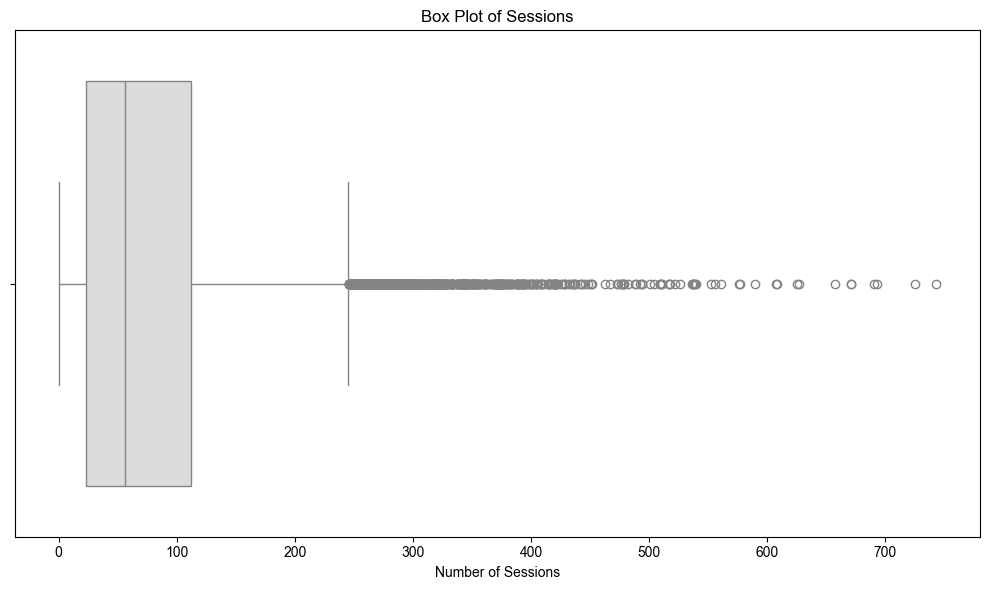

In [14]:
# Session box plot
import seaborn as sns
fig,ax= plt.subplots(figsize=(10,6))
sns.set_style("whitegrid")
sns.boxplot(data=df, x="sessions", palette="coolwarm")  # Now sns is defined
plt.title("Box Plot of Sessions")
plt.xlabel("Number of Sessions")
plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9596\3573526481.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="sessions", palette="coolwarm")


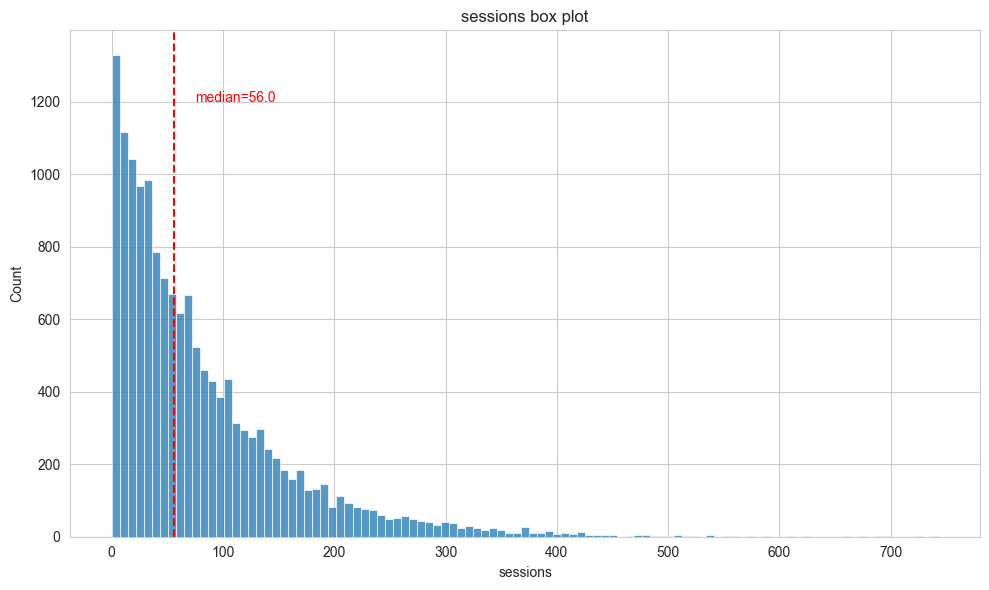

In [15]:
# Histogram
fig,ax= plt.subplots(figsize=(10,6))
sns.set_style("whitegrid")
sns.histplot(data=df, x="sessions", palette="coolwarm")
median = df['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, 'median=56.0', color='red')
plt.title('sessions box plot')
plt.tight_layout()
plt.show()

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9596\432829922.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="drives", palette="coolwarm")  # Now sns is defined


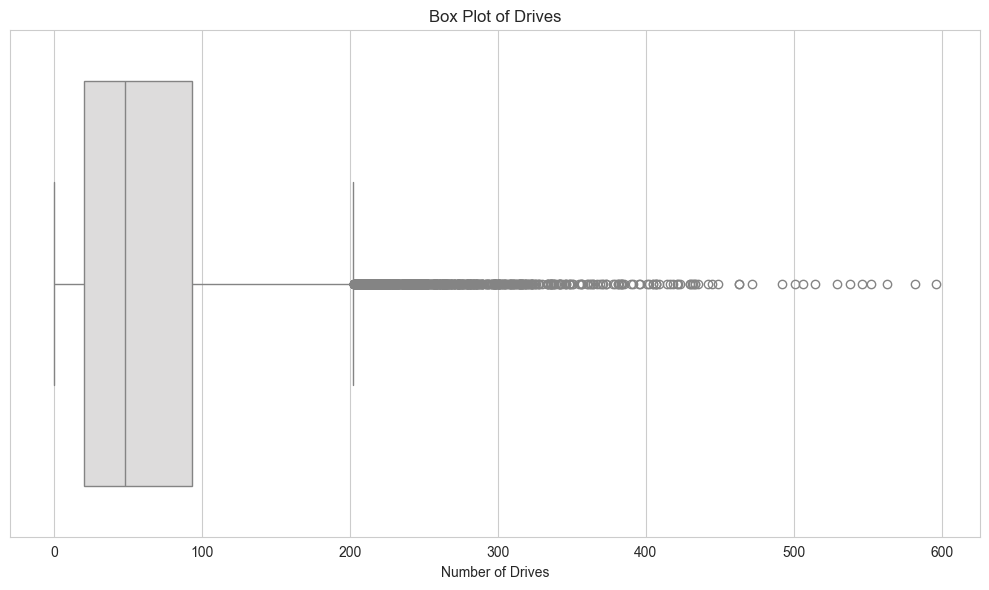

In [16]:
# drives box plot
fig,ax= plt.subplots(figsize=(10,6))
sns.set_style("whitegrid")
sns.boxplot(data=df, x="drives", palette="coolwarm")  # Now sns is defined
plt.title("Box Plot of Drives")
plt.xlabel("Number of Drives")
plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_9596\2124137455.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="sessions", bins=30, kde=True, palette="coolwarm")


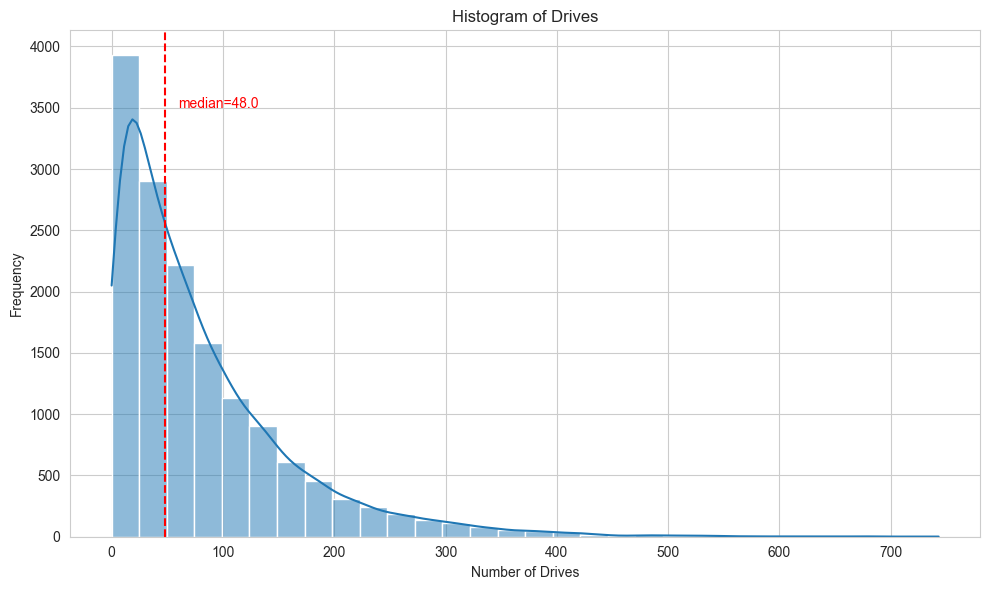

In [17]:
# Histogram
fig,ax= plt.subplots(figsize=(10,6))
sns.set_style("whitegrid")
sns.histplot(data=df, x="sessions", bins=30, kde=True, palette="coolwarm")
median = df['drives'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(60,3500, 'median=48.0', color='red')
plt.title("Histogram of Drives")
plt.xlabel("Number of Drives")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9596\3326002816.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="total_sessions", palette="coolwarm")


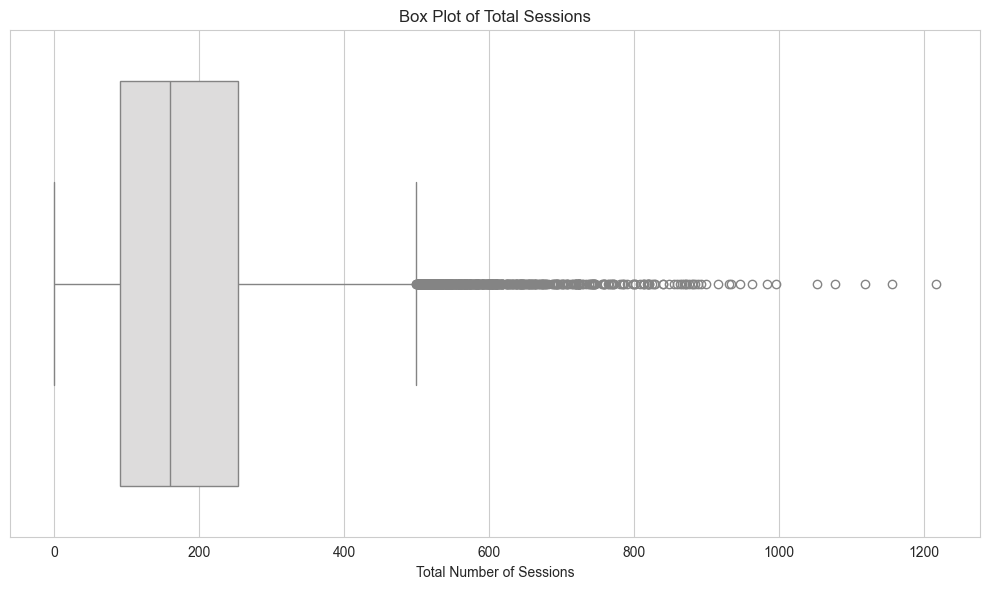

In [18]:
# Box plot
fig,ax= plt.subplots(figsize=(10,6))
sns.set_style("whitegrid")
sns.boxplot(data=df, x="total_sessions", palette="coolwarm")
plt.title("Box Plot of Total Sessions")
plt.xlabel("Total Number of Sessions")
plt.tight_layout()
plt.show()


In [19]:
# Histogram
# Helper function to plot histograms based on the
# format of the `sessions` histogram
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    fig,ax= plt.subplots(figsize=(10,6))
    sns.set_style("whitegrid")
    sns.histplot(x=df[column_str], **kwargs)                 # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram')
    plt.xlabel(f'{column_str}')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

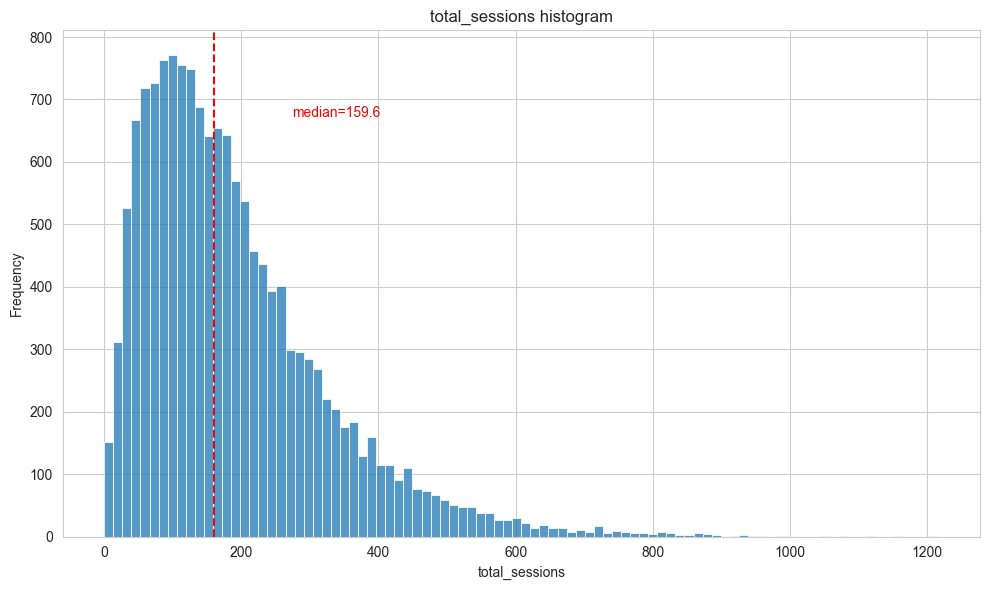

In [20]:
histogrammer('total_sessions')

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something you can examine more closely later.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9596\875309799.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="n_days_after_onboarding", palette="coolwarm")


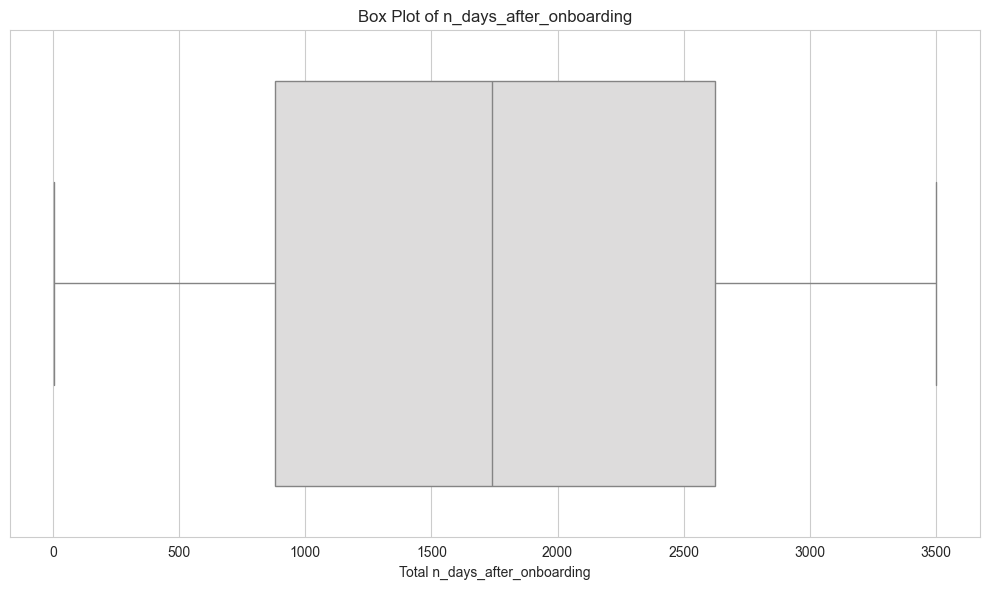

In [21]:
# Box plot
fig,ax= plt.subplots(figsize=(10,6))
sns.set_style("whitegrid")
sns.boxplot(data=df, x="n_days_after_onboarding", palette="coolwarm")
plt.title("Box Plot of n_days_after_onboarding")
plt.xlabel("Total n_days_after_onboarding")
plt.tight_layout()
plt.show()

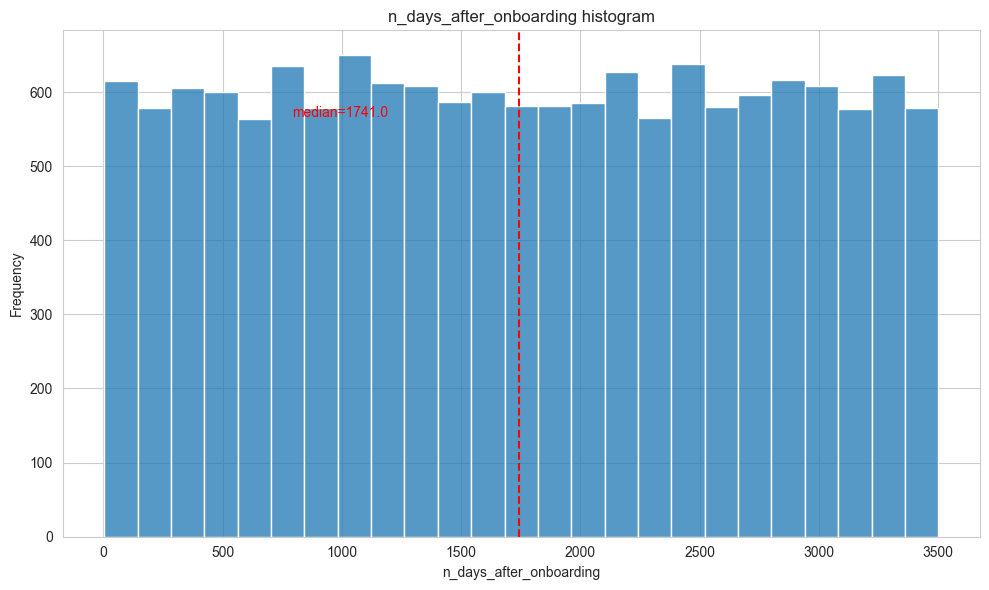

In [22]:
# Histogram
histogrammer('n_days_after_onboarding')

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9596\3637907842.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="driven_km_drives", palette="coolwarm")


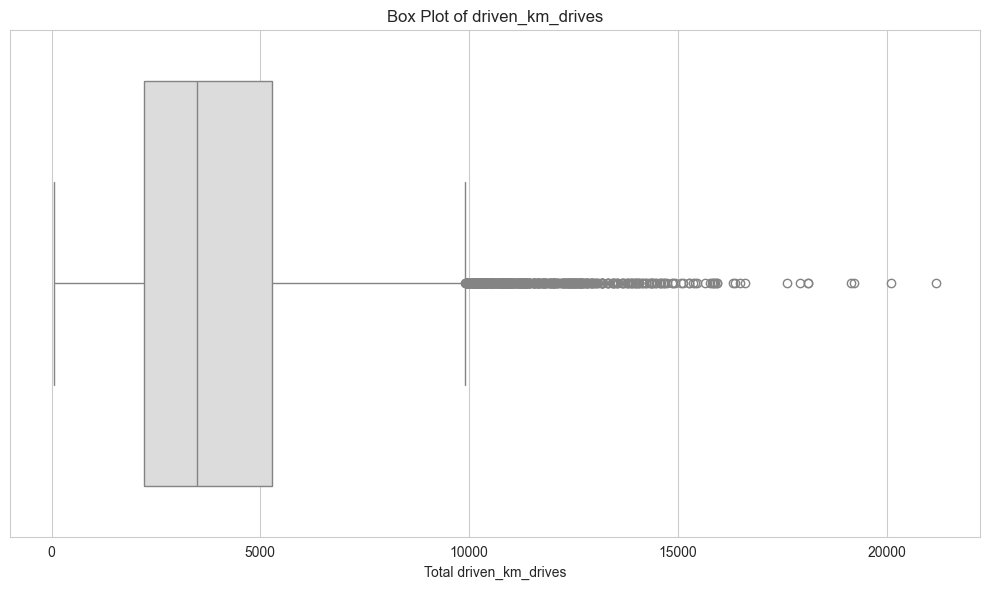

In [23]:
# Box plot
fig,ax= plt.subplots(figsize=(10,6))
sns.set_style("whitegrid")
sns.boxplot(data=df, x="driven_km_drives", palette="coolwarm")
plt.title("Box Plot of driven_km_drives")
plt.xlabel("Total driven_km_drives")
plt.tight_layout()
plt.show()
    

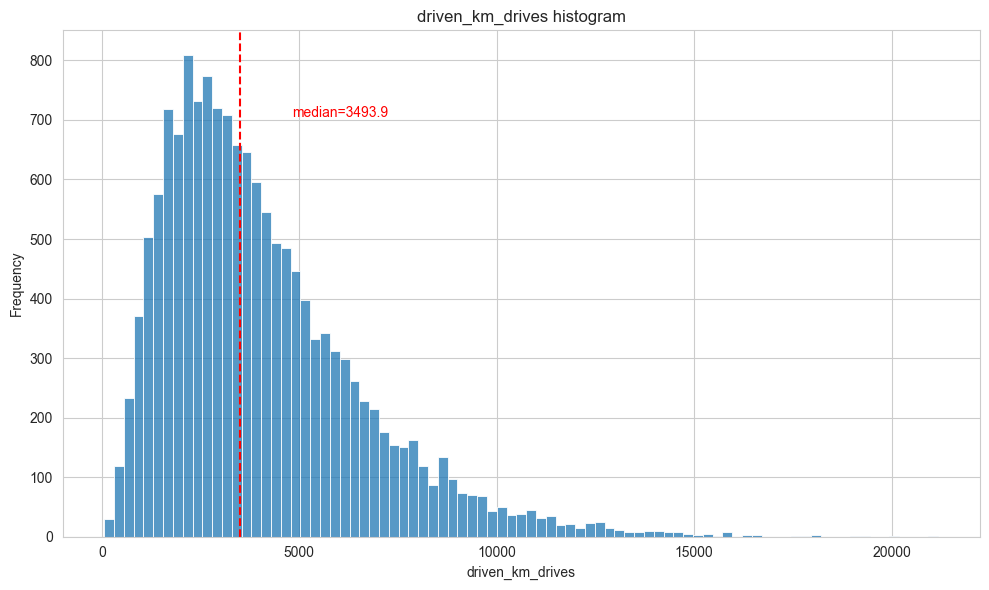

In [24]:
# Histogram
histogrammer('driven_km_drives')

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9596\1138254993.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="duration_minutes_drives", palette="coolwarm")


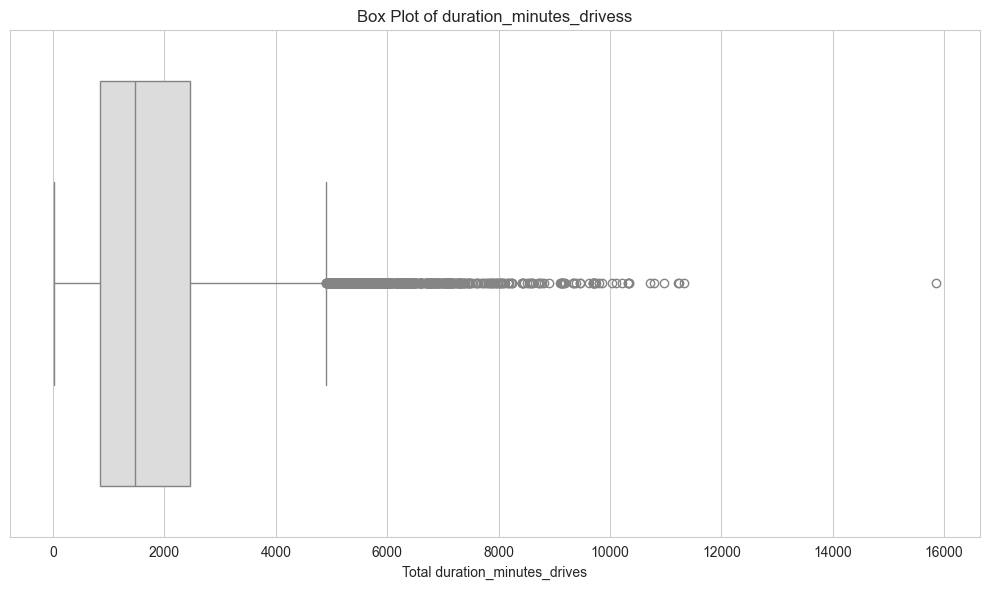

In [25]:
# Box plot
fig,ax= plt.subplots(figsize=(10,6))
sns.set_style("whitegrid")
sns.boxplot(data=df, x="duration_minutes_drives", palette="coolwarm")
plt.title("Box Plot of duration_minutes_drivess")
plt.xlabel("Total duration_minutes_drives")
plt.tight_layout()
plt.show()

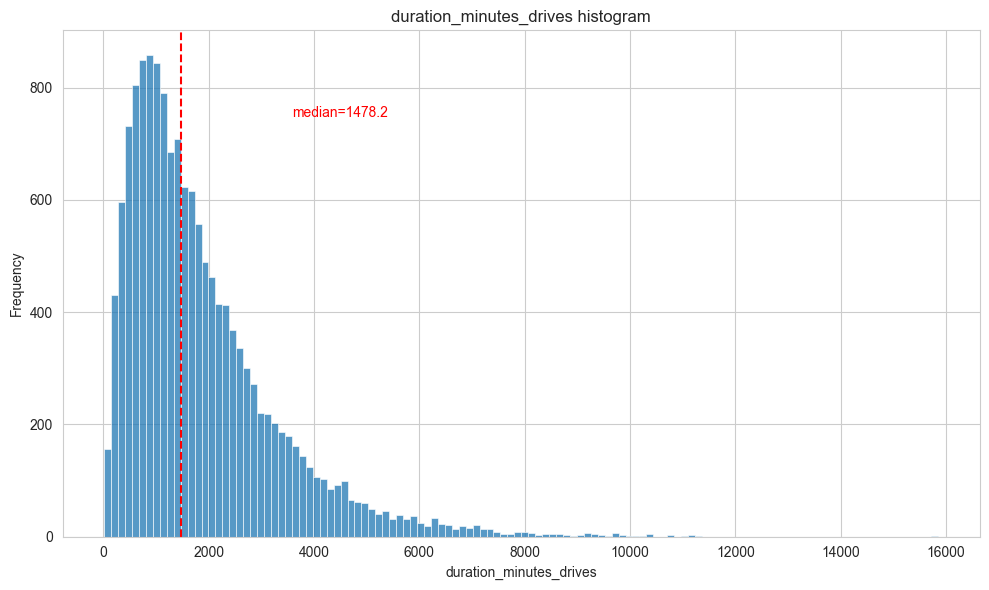

In [26]:
# Histogram
histogrammer('duration_minutes_drives')

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month_

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9596\2460138285.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="activity_days", palette="coolwarm")


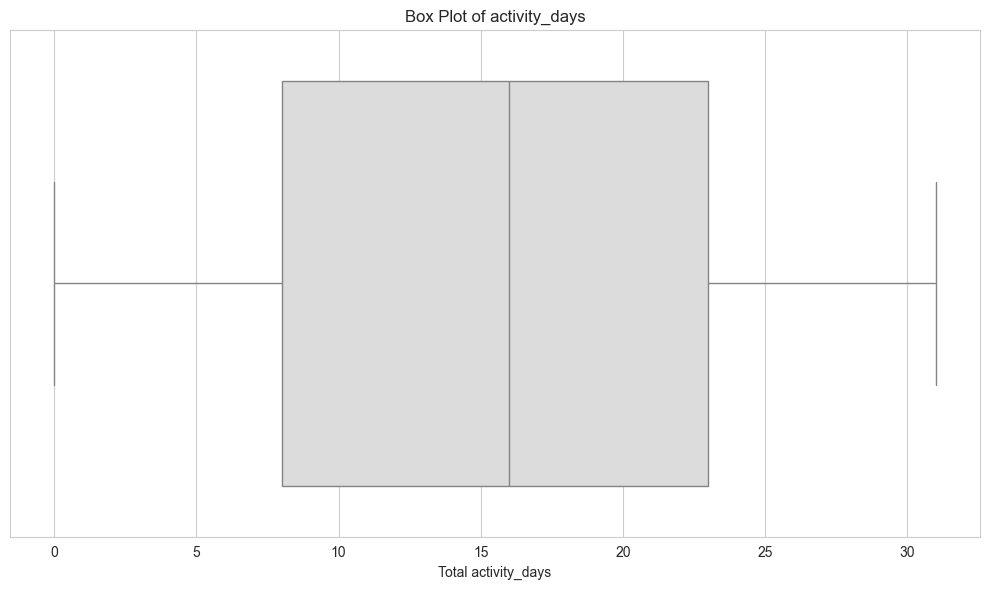

In [27]:
# Box plot
fig,ax= plt.subplots(figsize=(10,6))
sns.set_style("whitegrid")
sns.boxplot(data=df, x="activity_days", palette="coolwarm")
plt.title("Box Plot of activity_days")
plt.xlabel("Total activity_days")
plt.tight_layout()
plt.show()

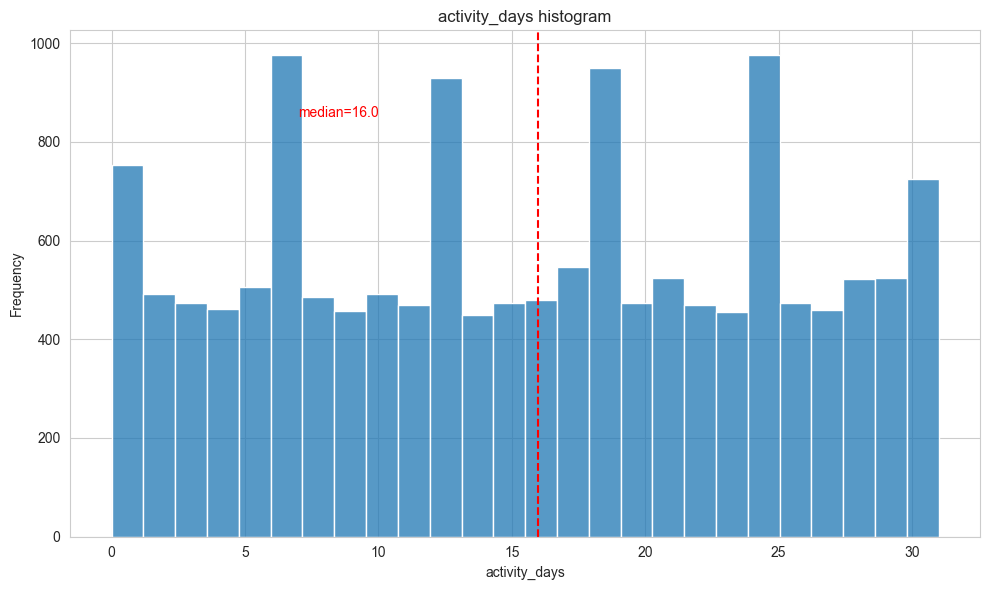

In [28]:
# Histogram
histogrammer('activity_days')

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9596\278892370.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="driving_days", palette="coolwarm")


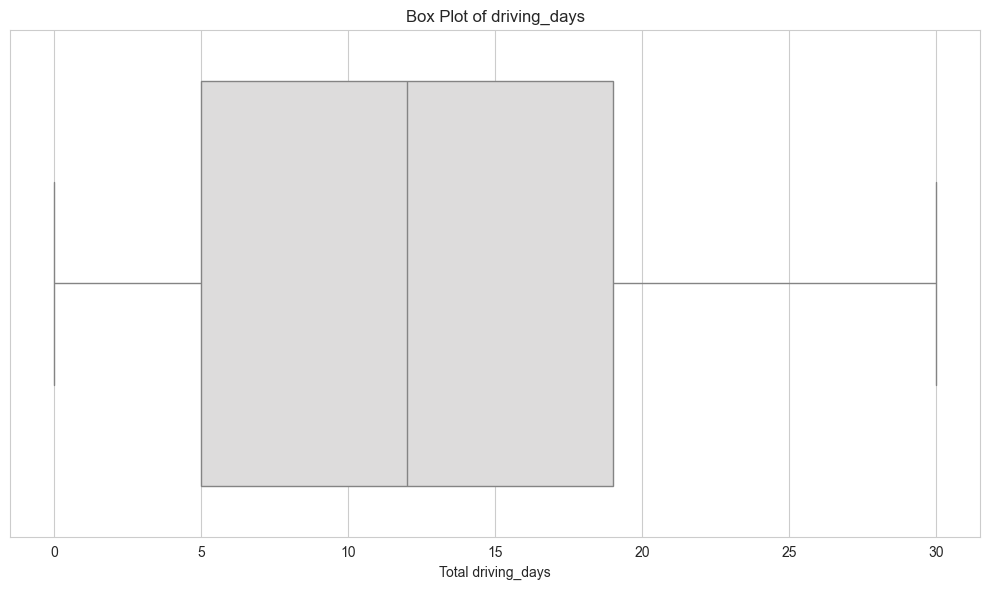

In [29]:
# Box plot
fig,ax= plt.subplots(figsize=(10,6))
sns.set_style("whitegrid")
sns.boxplot(data=df, x="driving_days", palette="coolwarm")
plt.title("Box Plot of driving_days")
plt.xlabel("Total driving_days")
plt.tight_layout()
plt.show()

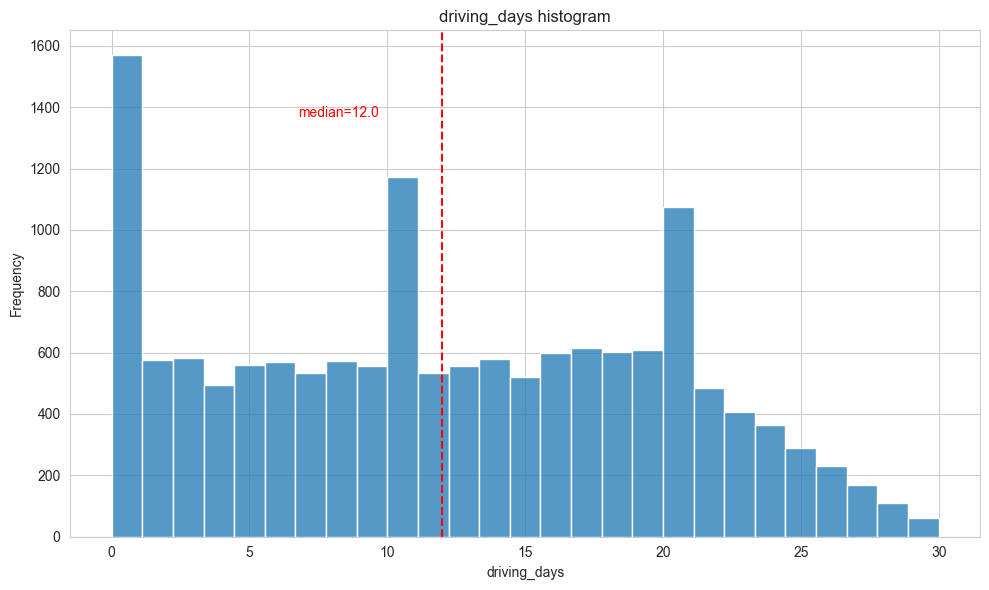

In [30]:
# Histogram
histogrammer('driving_days')

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

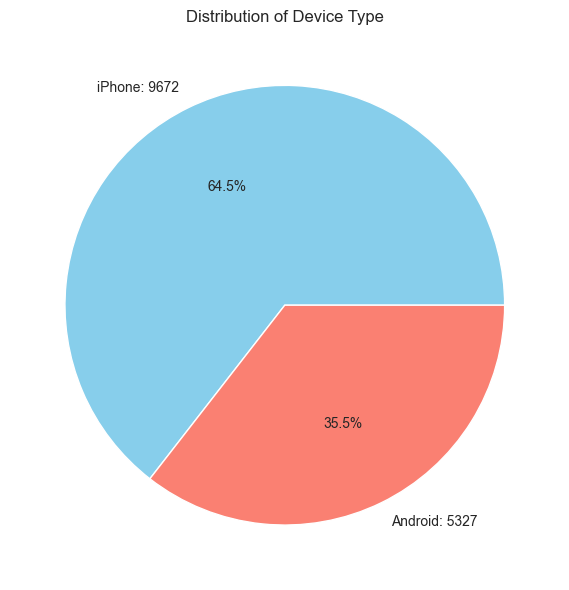

In [31]:
# Pie chart
fig,ax= plt.subplots(figsize=(10,6))
data_device = df["device"].value_counts()
plt.pie(data_device, autopct="%1.1f%%", labels=[f'{data_device.index[0]}: {data_device.values[0]}', f'{data_device.index[1]}: {data_device.values[1]}'], colors=["skyblue", "salmon"])
plt.title("Distribution of Device Type")
plt.tight_layout()
plt.show()

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

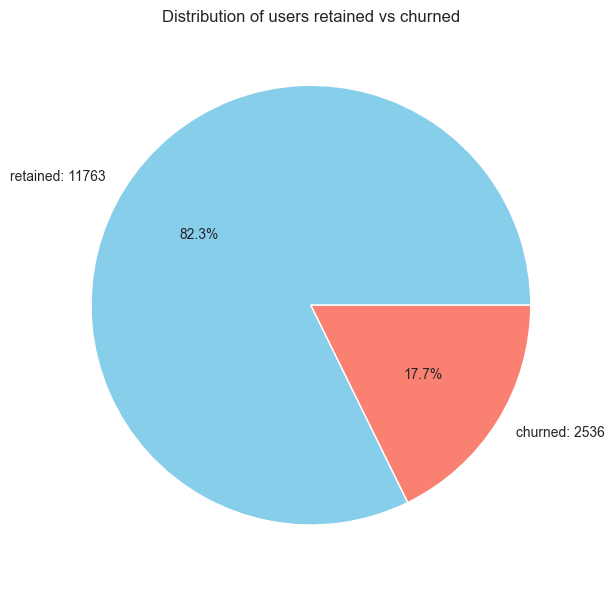

In [32]:
# Pie chart
fig,ax= plt.subplots(figsize=(10,6))
data_label = df["label"].value_counts()
plt.pie(data_label, autopct="%1.1f%%", labels=[f'{data_label.index[0]}: {data_label.values[0]}', f'{data_label.index[1]}: {data_label.values[1]}'],colors=["skyblue", "salmon"])
plt.title("Distribution of users retained vs churned")
plt.tight_layout()
plt.show()

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

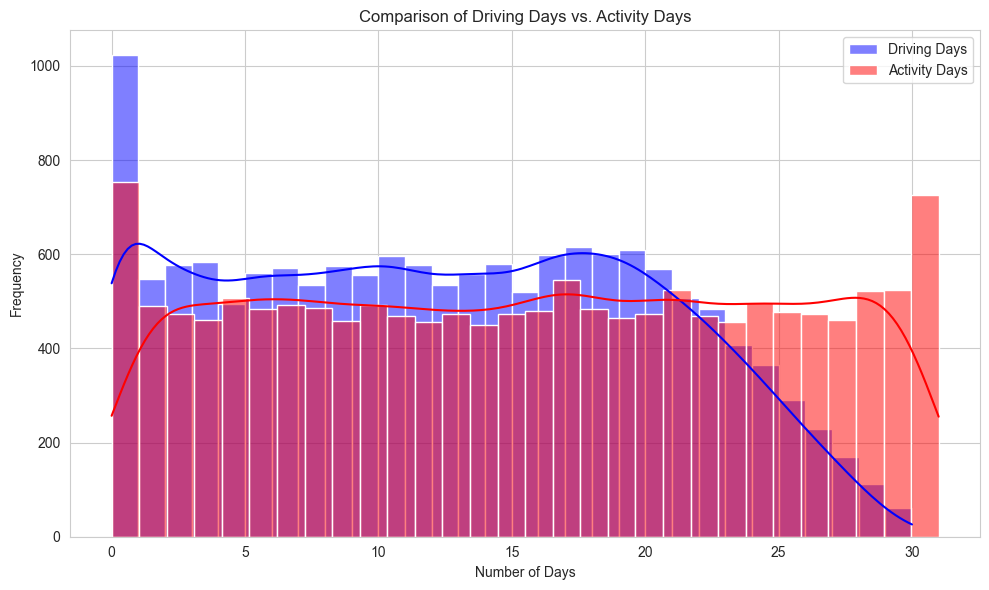

In [33]:
# Histogram
fig,ax= plt.subplots(figsize=(10,6))
sns.histplot(df["driving_days"], bins=30, color="blue", label="Driving Days", alpha=0.5, kde=True)
sns.histplot(df["activity_days"], bins=30, color="red", label="Activity Days", alpha=0.5, kde=True)

# Labels and title
plt.xlabel("Number of Days")
plt.ylabel("Frequency")
plt.title("Comparison of Driving Days vs. Activity Days")
plt.legend()
plt.tight_layout()
plt.show()

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [34]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

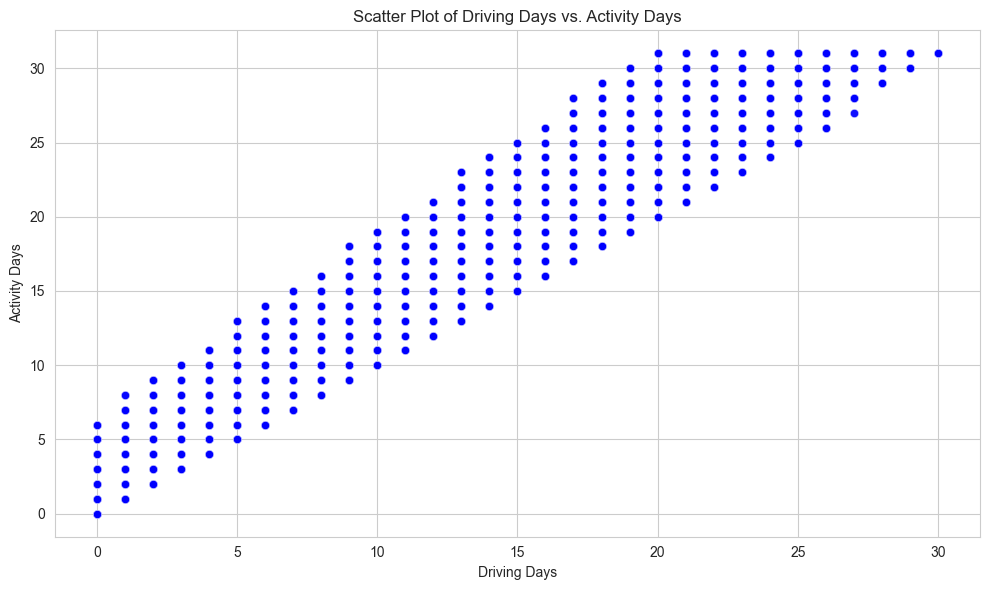

In [35]:
# Scatter plot
fig,ax= plt.subplots(figsize=(10,6))
sns.scatterplot(data=df, x="driving_days", y="activity_days", color="blue", alpha=0.6)

# Labels and title
plt.xlabel("Driving Days")
plt.ylabel("Activity Days")
plt.title("Scatter Plot of Driving Days vs. Activity Days")
plt.tight_layout()
plt.show()

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

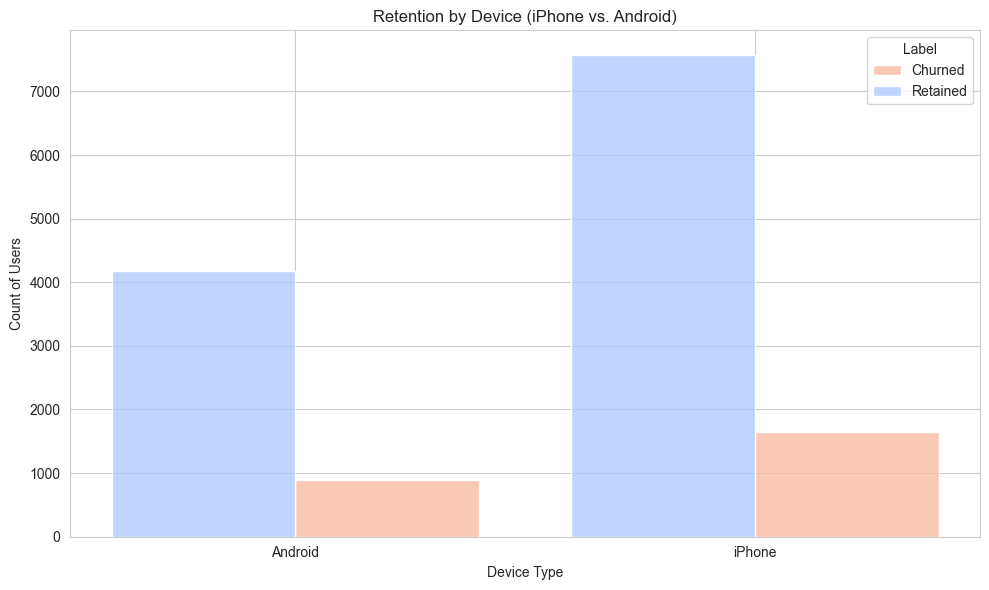

In [36]:
# Count the number of users for each device and retention status
fig,ax= plt.subplots(figsize=(10,6))
sns.set_style("whitegrid")

# Create a bar plot
sns.histplot(data=df, x="device", hue="label", multiple="dodge", shrink=0.8, palette="coolwarm")

# Labels and title
plt.xlabel("Device Type")
plt.ylabel("Count of Users")
plt.title("Retention by Device (iPhone vs. Android)")
plt.legend(title="Label", labels=["Churned", "Retained"]) 
plt.tight_layout()
plt.show()

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

In the previous course, you discovered that the median distance driven per driving day last month for users who churned was 697.54 km, versus 289.55 km for people who did not churn. Examine this further.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [37]:
# Create new column: km per driving day
df["km_per_driving_day"] = df["driven_km_drives"] / df["driving_days"]

# Handle potential division by zero cases (if driving_days is 0)
df["km_per_driving_day"] = df["km_per_driving_day"].replace([np.inf, -np.inf], np.nan)

# Display summary statistics
df["km_per_driving_day"].describe()

count    13975.000000
mean       621.385885
std       1054.745242
min          3.022063
25%        159.218602
50%        297.055428
75%        592.839874
max      15420.234110
Name: km_per_driving_day, dtype: float64

What do you notice? The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why do you think this is?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [38]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    13975.000000
mean       621.385885
std       1054.745242
min          3.022063
25%        159.218602
50%        297.055428
75%        592.839874
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

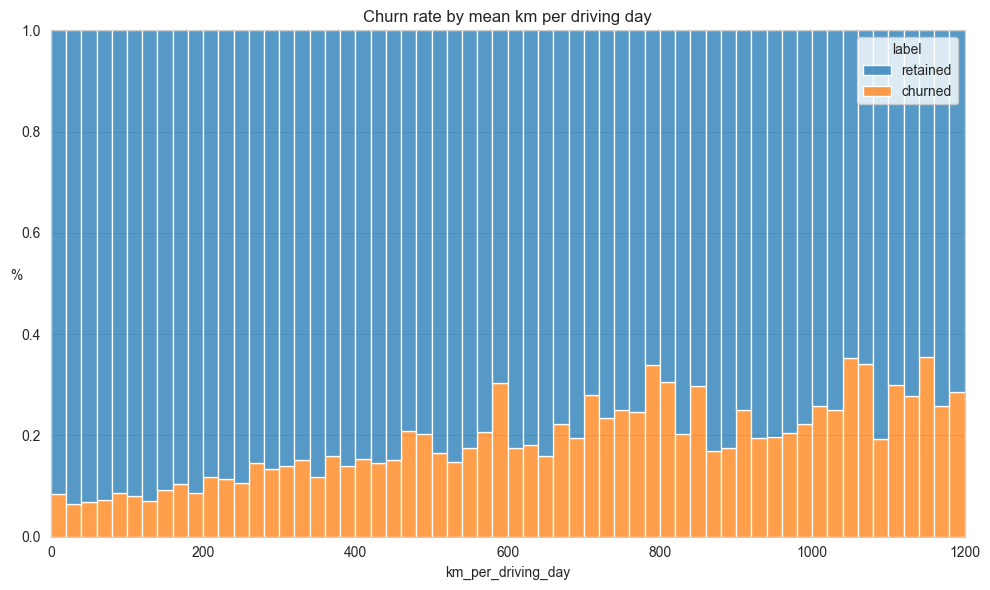

In [39]:
# Plot histogram with churn and retention categories
fig,ax= plt.subplots(figsize=(10,6))
sns.set_style("whitegrid")
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day')
plt.tight_layout()
plt.show()


The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

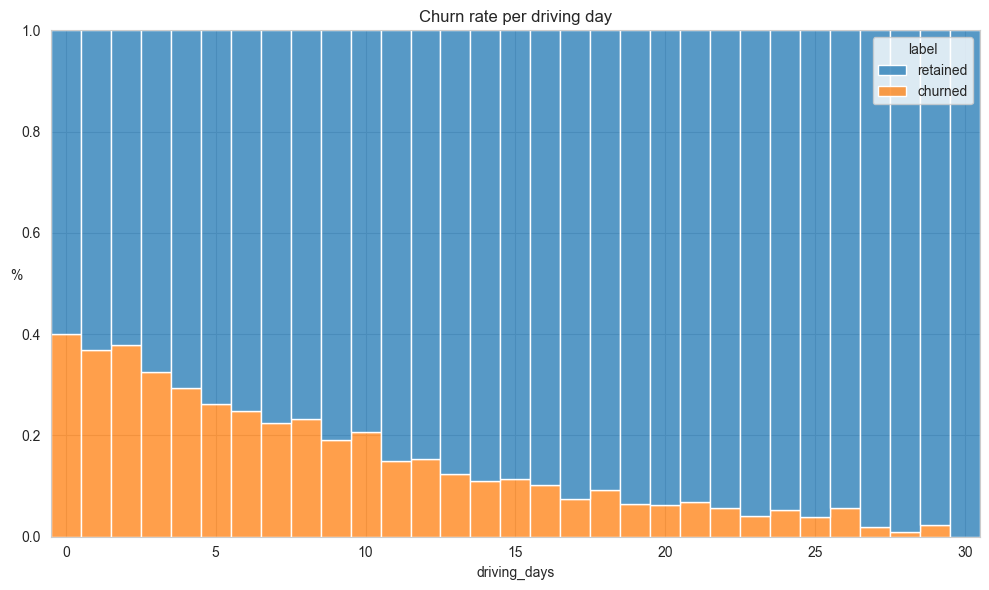

In [40]:
# Histogram
fig,ax= plt.subplots(figsize=(10,6))
sns.set_style("whitegrid")
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day')
plt.tight_layout()
plt.show()

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [41]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

What is the median value of the new column?

In [42]:
df['percent_sessions_in_last_month'].median()

np.float64(0.42309702992763176)

Now, create a histogram depicting the distribution of values in this new column.

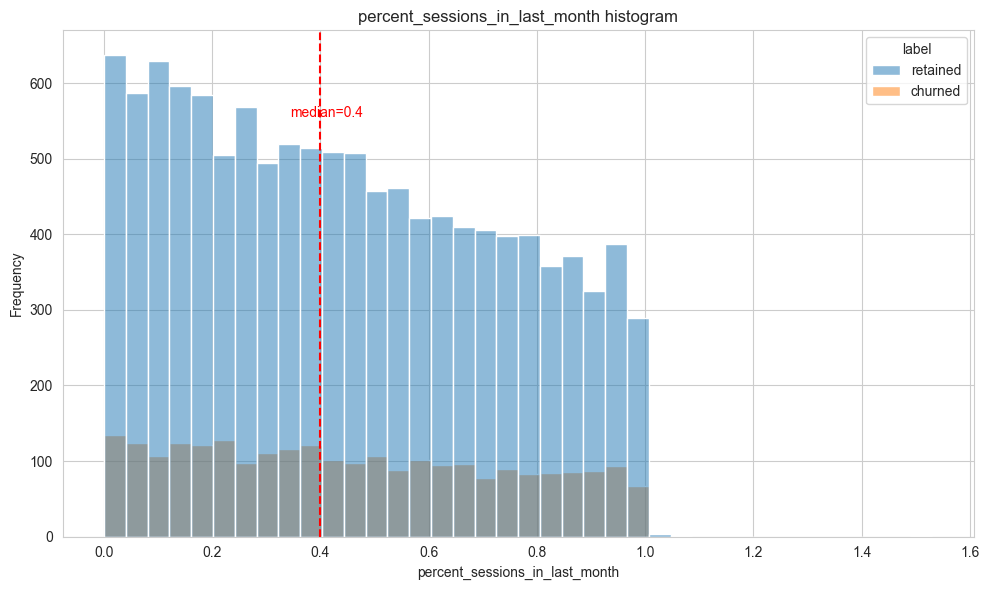

In [43]:
histogrammer('percent_sessions_in_last_month',
             hue=df['label'],
             multiple='layer',
             median_text=True)

Check the median value of the `n_days_after_onboarding` variable.

In [44]:
df['n_days_after_onboarding'].median()

np.float64(1741.0)

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

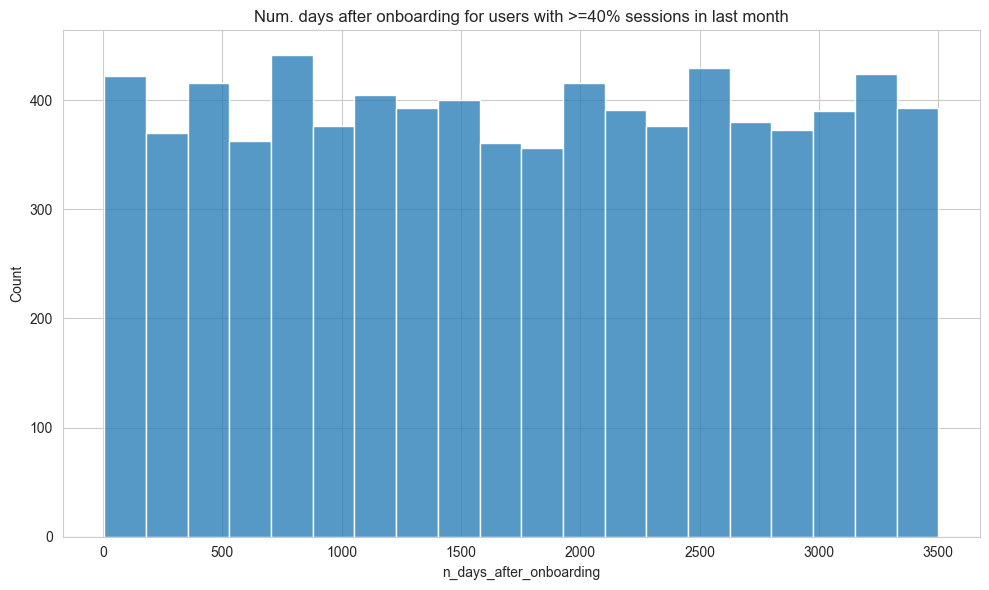

In [45]:
# Histogram
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
fig,ax= plt.subplots(figsize=(10,6))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month')
plt.tight_layout()
plt.show()

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### **Task 3b. Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what you'll be doing with this data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

To practice this technique, write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile.  such as the 95th percentile of the distribution.



In [46]:
def cap_outliers_multiple(df, columns):
    """
    Caps values above the 95th percentile for multiple columns in a DataFrame.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing the columns.
        columns (list): List of column names to process.
        
    Returns:
        pd.DataFrame: The modified dataframe with capped outliers.
    """
    for column in columns:
        percentile_95 = df[column].quantile(0.95)  # Calculate 95th percentile
        df[column] = df[column].clip(upper=percentile_95)  # Cap values
    return df

# List of columns to apply the transformation
columns_to_cap = ["sessions", "drives", "total_sessions", "driven_km_drives", "duration_minutes_drives"]



Next, apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [47]:
# Apply function
df = cap_outliers_multiple(df, columns_to_cap)

Call `describe()` to see if your change worked.

In [48]:
df[columns_to_cap].describe()

,sessions,drives,total_sessions,driven_km_drives,duration_minutes_drives
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,76.568705,64.058204,184.031320,3939.632764,1789.647426
std,67.297958,55.306924,118.600463,2216.041510,1222.705167
min,0.000000,0.000000,0.220211,60.441250,18.282082
25%,23.000000,20.000000,90.661156,2212.600607,835.996260
50%,56.000000,48.000000,159.568115,3493.858085,1478.249859
75%,112.000000,93.000000,254.192341,5289.861262,2464.362632
max,243.000000,201.000000,454.363204,8889.794236,4668.899349


#### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4a. Results and evaluation**

Having built visualizations in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

**Pro tip:** Put yourself in your client's perspective. What would they want to know?

Use the following code fields to pursue any additional EDA based on the visualizations you've already plotted. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

**Ask yourself:** Did you consider color, contrast, emphasis, and labeling?



I have learned ....

* There is missing data in the user churn label, so we might need  further data processing before further analysis.
* There are many outlying observations for drives, so we might consider a variable transformation to stabilize the variation.
* The number of drives and the number of sessions are both strongly correlated, so they might provide redundant information when we incorporate both in a model.
* On average, retained users have fewer drives than churned users.

My other questions are ....

* How does the missingness in the user churn label arise?
* Who are the users with an extremely large number of drives? Are they ridesharing drivers or commercial drivers?
* Why do retained users have fewer drives than churned users? Is it because churned users have a longer history of using the Waze app?
* What is the user demographic for retained users and churned users?

My client would likely want to know ...

* What are the key variables associated with user churn?
* Can we implement policies to reduce user churn?




Use the following two code blocks (add more blocks if you like) to do additional EDA you feel is important based on the given scenario.

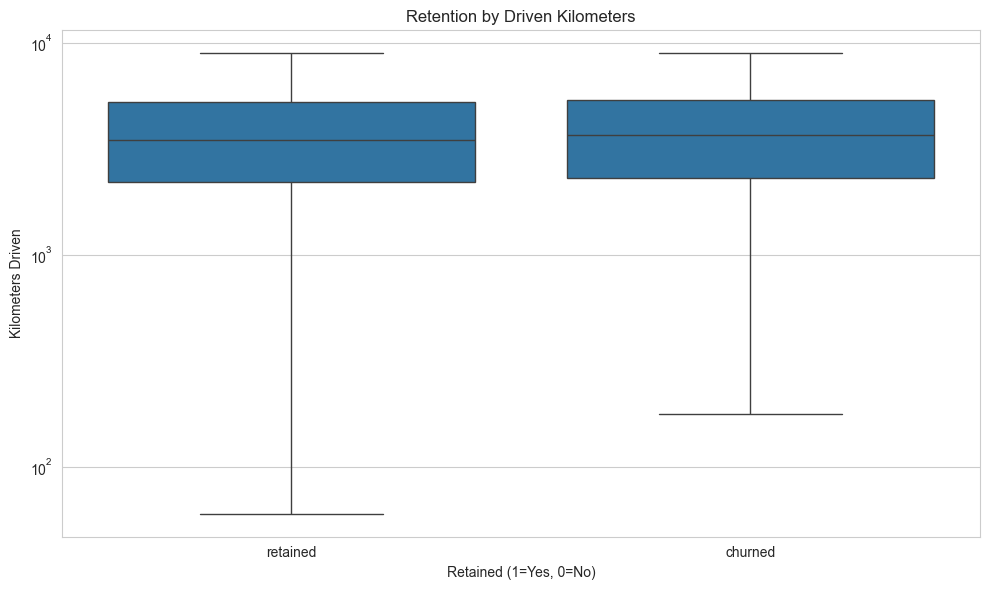

In [49]:
# Retention Rate by Driven Kilometers (Box Plot)
fig,ax= plt.subplots(figsize=(10,6))
sns.set_style("whitegrid")
sns.boxplot(data=df, x="label", y="driven_km_drives")
plt.title("Retention by Driven Kilometers")
plt.xlabel("Retained (1=Yes, 0=No)")
plt.ylabel("Kilometers Driven")
plt.yscale("log")  # Log scale for better visualization
plt.tight_layout()
plt.show()


**Insight:**

- This will help us see if churned users drive less than retained users.
- The log scale ensures better visualization of outliers.

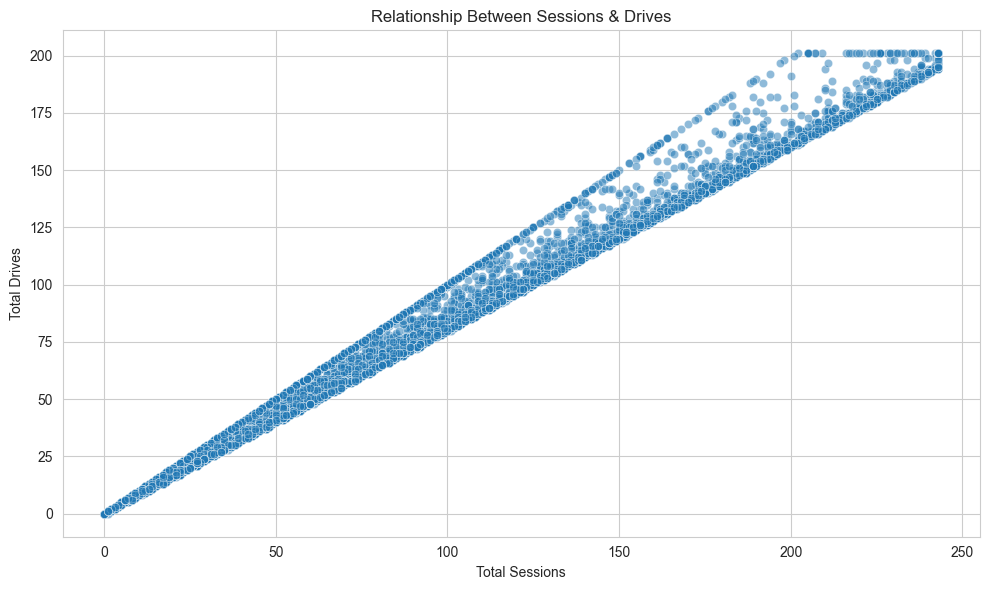

In [50]:
# Relationship Between Sessions & Drives (Scatter Plot)
fig,ax= plt.subplots(figsize=(10,6))
sns.set_style("whitegrid")
sns.scatterplot(data=df, x="sessions", y="drives", alpha=0.5)
plt.title("Relationship Between Sessions & Drives")
plt.xlabel("Total Sessions")
plt.ylabel("Total Drives")
plt.tight_layout()
plt.show()


**Insight:**

- This helps us understand if users with more sessions also tend to drive more.

### **Task 4b. Conclusion**

Now that you've explored and visualized your data, the next step is to share your findings with Harriet Hadzic, Waze's Director of Data Analysis. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What types of distributions did you notice in the variables? What did this tell you about the data?

> *Nearly all the variables were either very right-skewed or uniformly distributed. For the right-skewed distributions, this means that most users had values in the lower end of the range for that variable. For the uniform distributions, this means that users were generally equally likely to have values anywhere within the range for that variable.*

2. Was there anything that led you to believe the data was erroneous or problematic in any way?

> *Most of the data was not problematic, and there was no indication that any single variable was completely wrong. However, several variables had highly improbable or perhaps even impossible outlying values, such as `driven_km_drives`. Some of the monthly variables also might be problematic, such as `activity_days` and `driving_days`, because one has a max value of 31 while the other has a max value of 30, indicating that data collection might not have occurred in the same month for both of these variables.*

3. Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?

> *Yes. I'd want to ask the Waze data team to confirm that the monthly variables were collected during the same month, given the fact that some have max values of 30 days while others have 31 days. I'd also want to learn why so many long-time users suddenly started using the app so much in just the last month. Was there anything that changed in the last month that might prompt this kind of behavior?*

4. What percentage of users churned and what percentage were retained?

> *Less than 18% of users churned, and \~82% were retained.*

5. What factors correlated with user churn? How?

> *Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn. On the other hand, number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.*

6. Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?

> *No. Users of all tenures from brand new to \~10 years were relatively evenly represented in the data. This is borne out by the histogram for `n_days_after_onboarding`, which reveals a uniform distribution for this variable.*


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.